In [97]:
#import libraries
import numpy as np
import pandas as pd
import requests
import tweepy
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import seaborn as sns
%matplotlib inline

In [2]:
#Import file on hand
df=pd.read_csv('twitter-archive-enhanced.csv')

#Extract the tweet_id from url
df.tweet_id=df.expanded_urls.str.extract('(\d{18})')
df.tweet_id[0:5]

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [3]:
#Get file "image_predictions.tsv" from Udacity's server using Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open ('image_prediction.tsv', mode='wb') as file:
           file.write(response.content)

In [4]:
#Import the Image Predictions TSV file into a dataframe
image_predf = pd.read_csv('image_prediction.tsv', delimiter='\t')

In [5]:
#Query Twitter's API for each tweets's JSON data using Python's Tweepy library
#Create API object to gather API data. (DELETE) 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [6]:
#Gather data from twitter API using Python's Tweepy library and store data
#Writing JSON to a file
start = time.time() # start timer
working = []
not_working = []
# If the tweet json file does not exist, create it
tweet_json_file = 'tweet_json.txt'
exists = os.path.isfile(tweet_json_file)
if exists:
    print('{} already exists, no need to build the file again.'.format(tweet_json_file)) 
else:  
    with open ('tweet_json.txt', 'w', encoding='utf-8') as f:
        for i, tweet_id in df.tweet_id.iteritems():
            try:
                #Get tweet data using Twitter API
                tweet = api.get_status(tweet_id, tweet_mode = 'extended')
                json.dump(tweet._json, f)
                f.write('\n')
                working.append(tweet_id)
            except Exception as e:
                print(tweet_id, e)
                not_working.append(tweet_id)
# end timer
end = time.time() 
print((end - start)/(1000*60))     

tweet_json.txt already exists, no need to build the file again.
2.1096070607503255e-08


In [7]:
#Creating Pandas dataframe from JSON file
df2 = pd.read_json('tweet_json.txt', lines = True, encoding = 'utf-8')
df2.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37419,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,False,en,None,False,False,8125,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32151,False,This is Tilly. She's just checking pup on you....,NaN,...,False,en,None,False,False,6019,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [8]:
#Creating new dataframe with columns 'id', 'retweet_count', 'favorite_count' from former JSON file
tweet_data = df2.filter(['id', 'retweet_count', 'favorite_count'], axis=1)
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8125,37419
1,892177421306343426,6019,32151
2,891815181378084864,3983,24238
3,891689557279858688,8289,40720
4,891327558926688256,8978,38952


# Assess

The second step on the Data Wrangling process is to asses the dataframes both visually and programmatically. Then, recording any quality and tiddinies issues before performing the third step, cleaning. 

### Visually

In [9]:
#Printing the entire archive dataset
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
#Printing the entire image predictions dataset 
image_predf

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
#Printing the entire tweet_data from the JSON file dataset it
tweet_data

,id,retweet_count,favorite_count
0,892420643555336193,8125,37419
1,892177421306343426,6019,32151
2,891815181378084864,3983,24238
3,891689557279858688,8289,40720
4,891327558926688256,8978,38952
5,891087950875897856,2981,19565
6,890971913173991426,1976,11430
7,890729181411237888,18077,63075
8,890609185150312448,4089,26916
9,890240255349198849,7059,30859


### Programatically

In [11]:
#check the datatypes to see if they need to be fixed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [12]:
image_predf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 3 columns):
id                2173 non-null int64
retweet_count     2173 non-null int64
favorite_count    2173 non-null int64
dtypes: int64(3)
memory usage: 51.0 KB


In [14]:
#Checks the value_counts for the column name
df.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Lola             10
Penny            10
Tucker           10
Bo                9
Winston           9
Sadie             8
the               8
Buddy             7
Bailey            7
Daisy             7
an                7
Toby              7
Jack              6
Bella             6
Dave              6
Koda              6
Rusty             6
Scout             6
Leo               6
Milo              6
Stanley           6
Jax               6
Oscar             6
Louis             5
               ... 
Grizz             1
Ralphus           1
Moofasa           1
Jazz              1
Maisey            1
Jeffrie           1
Ralphson          1
Harnold           1
Lucky             1
Chuck             1
Ginger            1
Patch             1
Donny             1
Banjo             1
Lambeau           1
Combo             1
Skittles          1
Kona              1
unacceptable      1


In [15]:
#Checks values of the denominator column
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
#Checks for number of missing values in tweet_id colum from df table
sum(df.tweet_id.isnull())

166

In [17]:
#Creates a list of all the column names across the whole data set, all 3 tables
# and puts them into a series
all_columns = pd.Series(list(df) + list(image_predf) + list(tweet_data))
#Verifies if there are any duplicates
all_columns [all_columns.duplicated()]

17    tweet_id
dtype: object

In [18]:
#Checks for duplicate tweet_id in df table
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
55,NaN,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,NaN,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
113,NaN,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
123,868880397819494401,NaN,NaN,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None


In [19]:
#Checks for duplicate image_predf in df table
image_predf[image_predf.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [20]:
#Checks for duplicate tweet_data in df table
tweet_data[tweet_data.id.duplicated()]

,id,retweet_count,favorite_count
23,887473957103951883,17377,66601
71,878281511006478336,1238,7485
72,878057613040115712,6537,40728
94,873213775632977920,1535,7001
116,868880397819494401,14139,64085
119,868552278524837888,2044,9900
128,866450705531457537,34712,120043
129,866334964761202691,14162,51570
142,863062471531167744,2409,8378
153,860563773140209665,2138,7438


In [21]:
# Number of rows in df Dataframe  of which the values in 'retweeted_status_id' column is not null
df[df.retweeted_status_id == df.retweeted_status_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,887473957103951883,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886053434075471873,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,830583320585068544,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,878057613040115712,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878281511006478336,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,669000397445533696,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,876850772322988033,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,866334964761202691,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,868880397819494401,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873213775632977920,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


## Quality Issues

#### DF table: 
1. Eliminate retweets (duplicates). 

2. **"tweet_id" column:** is a string not an integer. There are 166 missing values.

3. **"in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" columns:** have a lot of missing values. Columns are unnecesary for this study. 

4. **"timestamp":** is a string instead of time data type.

5. **"name" column:** has several determiner values as "names"

6. **"source" column:** has unnecessary html tags instead of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>

7. **"rating_denominator" column:** has some numbers larger than 10.
 

#### Image_predf table:
1. **Columns "p1", "p2", "p3":** have categories on both lower case and letter case. Names of columns are not descriptive. 

#### "tweet_data" table:
1. There are duplicated elements with the same "tweet_id" in this table.
2. Change the name of "id" to "tweet_id" like the other tables. 

## Tidiness Issues

#### DF table: 

1. **"doggo", "floofer", "pupper", "puppo" columns:** should be in one column called "category".

#### Image_predf table:
1. **"breed" column**: should be added to df dataframe, using the values of p1_conf and p1_dog columns on image_predf (image predictions) table

#### "tweet_data" table:
1. Melt information with df table

# Cleaning
This is the third step of data wrangling process, where above quality and tidiness issues will be fixed.

In [22]:
# backup the dataset
df_clean = df.copy()
imagedf_clean = image_predf.copy()
tweetdf_clean = tweet_data.copy()

## DF Table: Quality Issues

### 1a. Define
Remove retweets (since they are duplicates) by dropping rows of which the values in 'retweeted_status_id' column is not null.

### 1b. Code

In [23]:
# remove rows of which the values in 'retweeted_status_id' column is not null
df_clean.drop(df_clean[df_clean.retweeted_status_id == df_clean.retweeted_status_id].index, inplace=True)

### 1c. Test

In [24]:
# Checks that there are no values in 'retweeted_status_id' column
df_clean[df_clean.retweeted_status_id == df_clean.retweeted_status_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 2a. Define

Before converting the "tweet_id" column data type from a string to an integer using astype, drop the missing values.


### 2b. Code

In [25]:
# Drops missing values from df_clean
df_clean.dropna(subset=['tweet_id'], how='all', inplace = True)

# Changes the datatype of "twee_id" from string to int
df_clean = df_clean.astype({"tweet_id":int})

### 2c. Test

In [26]:
#Verifies that the sum of missing values in the column "tweet_id" is 0
df_clean.tweet_id.isna().sum()

0

In [27]:
#Checks if the datatype of the tweet_id is int
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2023 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2023 non-null object
source                        2023 non-null object
text                          2023 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2023 non-null object
rating_numerator              2023 non-null int64
rating_denominator            2023 non-null int64
name                          2023 non-null object
doggo                         2023 non-null object
floofer                       2023 non-null object
pupper                        2023 non-null object
puppo                         2023 non-null object
dtypes: float64(4), int64(3), object(1

### 3a. Define
Delete columns: "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp".

### 3b. Code

In [28]:
# Drops the unnecessary columns 
columns_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', \
                'in_reply_to_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']

df_clean = df_clean.drop(columns_drop, axis = 1)

### 3c. Test

In [29]:
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 4a. Define
Converts "timestamp"column datatype from string to time.

### 4b. Code

In [30]:
#Converts "timestamp"column datatype from string to time.
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

### 4c. Test

In [31]:
df_clean['timestamp'].head(3)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
Name: timestamp, dtype: datetime64[ns]

### 5a. Define
"name" column: has several determiner values such as "a", "an" and "the" as "names". We are going to replace them all with the value "None".

### 5b. Code

In [32]:
#Replaces determiners ""a", "an" and "the" from the column "name" to None
df_clean['name'] = df_clean.name.replace(['a','an','the'], None)

### 5c. Test

In [33]:
df_clean[df_clean.name == 'the']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
df_clean[df_clean.name == 'a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
df_clean[df_clean.name == 'an']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 6a. Define 
Extract actual source in "source" column from html tags instead of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone
    
### 6b. Code    

In [36]:
#Checks the types of sources in the "source" column
df_clean.source.value_counts()
#There are 3 types of sources: "Twitter for iphone", "Twitter Web Client","TweetDeck"

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1984
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [37]:
#Replaces the utility names in the source column with the source 
df_clean.source = df_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

#Converts the data type of the column source to category
df_clean.source = df_clean.source.astype('category')

### 6c. Test

In [38]:
df_clean.source.value_counts()

Twitter for iPhone    1984
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [39]:
df_clean.info()
#source column is succesfully changed to category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2023 non-null int64
timestamp             2023 non-null datetime64[ns]
source                2023 non-null category
text                  2023 non-null object
expanded_urls         2023 non-null object
rating_numerator      2023 non-null int64
rating_denominator    2023 non-null int64
name                  2023 non-null object
doggo                 2023 non-null object
floofer               2023 non-null object
pupper                2023 non-null object
puppo                 2023 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 191.7+ KB


### 7a. Define
Convert all denominators in the column "rating_denominator" larger than 10 to 10.

### 7b. Code

In [40]:
df_clean.rating_denominator.value_counts()

10     2005
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [41]:
df_clean.rating_denominator = df_clean.rating_denominator.replace([50, 80, 11, 170,150,130,120,110,90,70,40,20], \
                                                                  10)

### 7c. Test

In [42]:
df_clean.rating_denominator.value_counts()

10    2021
7        1
2        1
Name: rating_denominator, dtype: int64

## Image_predf Table: Quality Issues

### 1a. Define
Columns "p1", "p2", "p3": have categories on both lower case and letter case. Change the column names to more descriptive ones using "rename" function

### 1b. Code

In [43]:
#Converts all rows to lowercase
imagedf_clean['p1'].str.lower()
imagedf_clean['p2'].str.lower()
imagedf_clean['p3'].str.lower()

#Change the column names
imagedf_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

### 1c. Test

In [44]:
imagedf_clean.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Tweet_data Table: Quality Issues

### 1a. Define
Drop the 141 duplicated elements and rename colum "id as "tweet_id" just like the other tables

### 1b. Code

In [45]:
sum(tweetdf_clean.id.duplicated())

141

In [46]:
#Checks the duplicated rows 
duplicateRowsDF = tweetdf_clean[tweetdf_clean.duplicated(['id'])]
duplicateRowsDF

,id,retweet_count,favorite_count
23,887473957103951883,17377,66601
71,878281511006478336,1238,7485
72,878057613040115712,6537,40728
94,873213775632977920,1535,7001
116,868880397819494401,14139,64085
119,868552278524837888,2044,9900
128,866450705531457537,34712,120043
129,866334964761202691,14162,51570
142,863062471531167744,2409,8378
153,860563773140209665,2138,7438


In [47]:
#Make sure that all data is duplicated
tweetdf_clean[tweetdf_clean.id == 887473957103951883]

,id,retweet_count,favorite_count
19,887473957103951883,17377,66601
23,887473957103951883,17377,66601


In [48]:
tweetdf_clean[tweetdf_clean.id == 700143752053182464] 

,id,retweet_count,favorite_count
760,700143752053182464,2849,7747
1269,700143752053182464,2849,7747


In [49]:
#Drops the duplicated data
tweetdf_clean = tweetdf_clean.drop_duplicates(['id'])

In [50]:
#Renames column "id" to "tweet_id"
tweetdf_clean.rename(columns={'id':'tweet_id'}, inplace = True)

### 1c. Test

In [51]:
#Checks for duplicate tweetdf_clean in df table and the succesful rename of colum
tweetdf_clean[tweetdf_clean.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


## DF Table: Tidiness Issues

### 1a. Define
"doggo", "floofer", "pupper", "puppo" columns: should be in one column called "Category".

### 1b. Code

In [52]:
#Merge the doggo, floofer, pupper and puppo columns to a stage column
df_clean['category'] = df_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

#Convert the datatype from string to categorical
df_clean.category = df_clean.category.astype("category")

#Drop the four old colomns
df_clean = df_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

### 1c. Test

In [53]:
df_clean.category.value_counts()

None       1712
pupper      214
doggo        66
puppo        23
floofer       8
Name: category, dtype: int64

In [56]:
df_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,category
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


## Image_predf table: Tidiness Issues

### 1a. Define
"breed" column: should be added to df_clean dataframe, using the values of 'first_prediction', 'first_confidence' and 'first_dog' columns on image_predf (imagedf_clean) table.

### 1b. Code

In [54]:
imagedf_clean.head(15)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [55]:
#Create new dataframe new_imagedf with selected columns, merge new_imagedf
#with df_clean and rename the columns 'first_prediction','first_confidence',
#'first_dog' to 'predicted_breed', confidence','test_result' respectively
new_imagedf = imagedf_clean[['tweet_id', 'first_prediction','first_confidence', 'first_dog']]
df_clean2 = pd.merge(df_clean, new_imagedf, on = 'tweet_id',how = 'left')
df_clean2 = df_clean2.rename(columns = {'first_prediction': 'predicted_breed','first_confidence': 'confidence', 'first_dog': 'test_result'})

### 1c. Test

In [56]:
df_clean2.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,category,predicted_breed,confidence,test_result
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Chihuahua,0.323581,True


## "Tweet_data" table: Tidiness Issues
### 1a. Define
Merge "tweetdf_clean" table with the "df_clean2" table, joining on "tweet_id"

### 1b. Code

In [57]:
#Merges the "tweetdf_clean" table with the "df_clean2" table, joining on "tweet_id"
df_clean2 = pd.merge(df_clean2, tweetdf_clean, on = 'tweet_id',how = 'left')

In [142]:
#Summary of "Missing Values"
df_clean2.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls          0
rating_numerator       0
rating_denominator     0
name                   0
category               0
predicted_breed       29
confidence            29
test_result           29
retweet_count         11
favorite_count        11
dtype: int64

In [145]:
#Delete rows with missing values in the columns 'predicted_breed', 
#'confidence', 'test_result', retweet_count', 'favorite_count'                      '
df_clean2 = df_clean2.dropna(subset=['predicted_breed', 'confidence', 'test_result', 
                         'retweet_count', 'favorite_count'])

### 1c. Test 

In [146]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2022
Data columns (total 14 columns):
tweet_id              1988 non-null int64
timestamp             1988 non-null datetime64[ns]
source                1988 non-null category
text                  1988 non-null object
expanded_urls         1988 non-null object
rating_numerator      1988 non-null int64
rating_denominator    1988 non-null int64
name                  1988 non-null object
category              1988 non-null category
predicted_breed       1988 non-null object
confidence            1988 non-null float64
test_result           1988 non-null object
retweet_count         1988 non-null float64
favorite_count        1988 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 206.1+ KB


## Store Data
Store the clean DataFrame df_clean2 in a CSV file named twitter_archive_master.csv

In [147]:
df_clean2.to_csv('twitter_archive_master.csv', index=False)

## Analysis and Visualization

### Distribution Source

In [148]:
#Creates categorial index for 'TweetDeck', 'Twitter Web Client' and 'Twitter for iPhone'
sorted_source = df_clean2['source'].value_counts().index
#Visualizes the value counts of the column "source"
df_clean2['source'].value_counts()

Twitter for iPhone    1950
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [149]:
#Countplot would better visualize the categorial data in the column "source"
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2022
Data columns (total 14 columns):
tweet_id              1988 non-null int64
timestamp             1988 non-null datetime64[ns]
source                1988 non-null category
text                  1988 non-null object
expanded_urls         1988 non-null object
rating_numerator      1988 non-null int64
rating_denominator    1988 non-null int64
name                  1988 non-null object
category              1988 non-null category
predicted_breed       1988 non-null object
confidence            1988 non-null float64
test_result           1988 non-null object
retweet_count         1988 non-null float64
favorite_count        1988 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 206.1+ KB


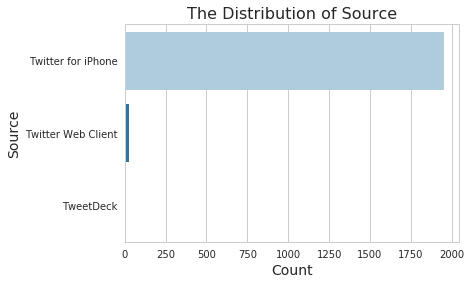

In [150]:
#Plot the column "source" based on value counts and ordered by "sorted_source"

sns.set(style="whitegrid")
df = df_clean2
ax = sns.countplot(data = df, y = 'source', order = sorted_source, 
                   palette="Paired")
ax.set_ylabel('Source', fontsize=14)
ax.set_xlabel('Count', fontsize=14)
ax.set_title('The Distribution of Source',fontsize=16);


The previous plot shows the distribution of source, and illustrates that contributions to "We Rate Dogs" are mostly from the iPhone twitter app (98% in total), while the use of TweetDesk is pretty rare (less than 1%). 

### Distribution of Favorite and Retweets Counts

In [151]:
# Computes correlation of columns using the method 'pearson' for standard correlation coefficient
corr = df.corr(method='pearson')

# 'retweet_count' is positively correlates with 'favorite_count' : r^2 = 0.935
corr

,tweet_id,rating_numerator,rating_denominator,confidence,retweet_count,favorite_count
tweet_id,1.000000,0.023621,0.012821,0.104385,0.382365,0.610053
rating_numerator,0.023621,1.000000,0.003482,-0.009055,0.018185,0.015898
rating_denominator,0.012821,0.003482,1.000000,-0.028485,0.013223,0.015890
confidence,0.104385,-0.009055,-0.028485,1.000000,0.047476,0.070090
retweet_count,0.382365,0.018185,0.013223,0.047476,1.000000,0.929473
favorite_count,0.610053,0.015898,0.015890,0.070090,0.929473,1.000000


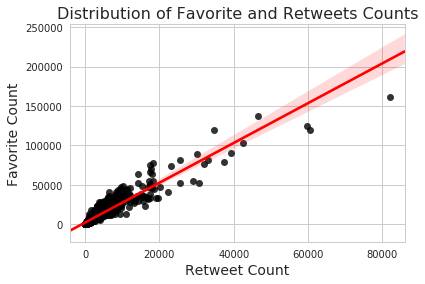

In [152]:
# Plot the correlation between columns "retweet_count" and "favorite_count"

ax1 = sns.regplot(x="retweet_count", y="favorite_count", 
            data=df, scatter_kws = {"color": "black"}, line_kws={"color": "red"})
ax1.set_xlabel('Retweet Count', fontsize =14)
ax1.set_ylabel('Favorite Count', fontsize = 14)
ax1.set_title('Distribution of Favorite and Retweets Counts',fontsize=16);
plt.show();


There is a strong positive correlation between 'retweet_count' and 'favorite_count'. It seems to illustrate that retweets reach larger audiences hence more favorite counts. 

### Most Common Names 

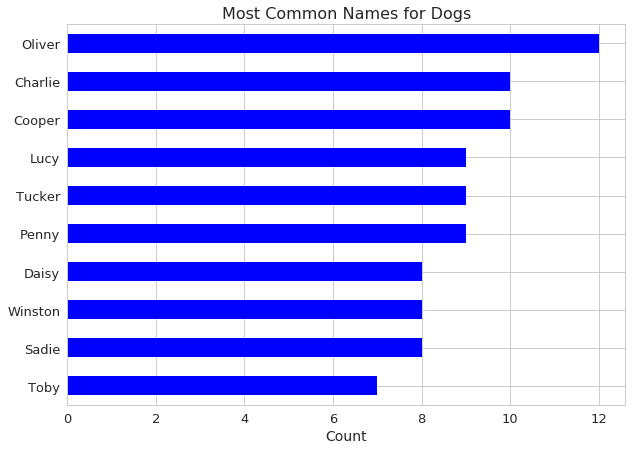

In [153]:
# Plot the most common names of dogs 

#Drop the 605 rows that have "None" as a value  
s = df.name.value_counts()[1:11] 
ax2 = s.plot(kind='barh', figsize=(10,7), color="blue", fontsize=13);

# Add a title and informative axis label
ax2.set_title("Most Common Names for Dogs", fontsize=16)
ax2.set_xlabel("Count", fontsize= 14)

#Inverts order (largest on top) for easier readibility 
ax2.invert_yaxis() 

According to our data, most owners seem to forget to add the name of their dog when they are tweeting about them. However, for those who remember to add the name of their dogs, the data shows that "Oliver" is the most popular name. 

### Classification of Dogs

In [157]:
#Counts which are the most common predicted breeds in the dataframe
df['predicted_breed'].value_counts().head(15)

golden_retriever            139
Labrador_retriever           93
Pembroke                     88
Chihuahua                    79
pug                          54
chow                         41
Samoyed                      39
toy_poodle                   38
Pomeranian                   38
malamute                     29
cocker_spaniel               27
French_bulldog               25
Chesapeake_Bay_retriever     23
miniature_pinscher           22
seat_belt                    21
Name: predicted_breed, dtype: int64

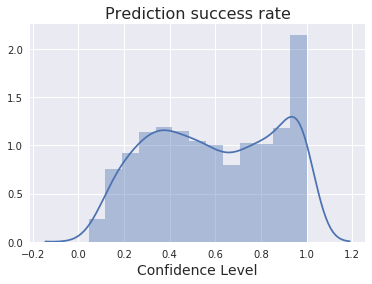

In [163]:
# Plots the prediction success rate of whether or not first prediction is a breed of dog.
sns.set(style='darkgrid')
ax3 = sns.distplot(df['confidence'])
ax3.set_xlabel("Confidence Level", fontsize= 14);
ax3.set_title("Prediction success rate", fontsize = 16);

The neural network from Udacity seems to suggest that "Golden_retriever" and "Labrador_retriever" are the two of the most common breeds of dogs, followed by "Pembroke" and "Chihuahua". However the plot shows that the entire distribution is dominated by amounts between 0.1 and 0.8, which could suggest that the model used still requires some work since its information might not be accurate. 

## Reference

Twitter API Guide: https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/

Tweepy documentation: https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf

WeRateDogs Twitter: https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor